In [1]:
from src.brokers import Broker
from src.markets import Market
from src.simulators import base_simulator
from src.traders import Trader
from src.utils import portfolio_values, yields, fees_and_tax, plot_performance_metrics, print_performance_summary

from src.optimization import BayesianOptimizer
from src.logging_config import setup_logging
import logging

import numpy as np

2026-02-22 17:39:04 | INFO     | trader_backtest                | Logging initialized - File: logs/trader_backtest.log, Console: True


In [2]:
# Initialize logging system
setup_logging(
    console_level="INFO",
    file_level="INFO",
    log_file="portfolio_bayes_optimization.log",
    log_dir="logs",
    enable_console=True,
    enable_file=True,
)

2026-02-22 17:39:05 | INFO     | trader_backtest                | Logging initialized - File: logs/portfolio_bayes_optimization.log, Console: True


<Logger trader_backtest (DEBUG)>

In [3]:
# Define 9 tickers to optimize
tickers = [
    'AAPL',   # Apple
    'GOOGL',  # Google
    'IBIT',   # Bitcoin ETF
    'META',   # Meta
    'IBM',    # IBM
    'PHO',    # Water Tech ETF
    'VTI',    # VTI
    'NVDA',   # Nvidia
    'MSFT'    # Microsoft
]
my_period = 30
my_ratios_percent = [16.7, 22.4, 2.5, 11.1, 12.0, 7.4, 9.2, 16.7, 2.0]
my_ratios = list(np.array(my_ratios_percent) / np.sum(my_ratios_percent))
assert(np.sum(my_ratios) == 1) 


# set parameters
start_date = (2024, 2, 16)
end_date = (2026, 2, 20)
initial_liquid = 1000000.0
buy_fee = 0.08
min_buy_fee = 2.0
sell_fee = 0.08
min_sell_fee = 2.0
tax = 25.0
deposit = 0.0
deposit_period = 30
sell_strategy = 'LIFO'
verbose = False

In [4]:
# Initialize optimizer
print("Initializing Bayesian Optimizer...")
optimizer = BayesianOptimizer(
    tickers=tickers,
    start_date=start_date,
    end_date=end_date,
    initial_liquid=initial_liquid,
    buy_fee=buy_fee,
    min_buy_fee=min_buy_fee,
    sell_fee=sell_fee,
    min_sell_fee=min_sell_fee,
    tax=tax,
    deposit=deposit,
    deposit_period=deposit_period,
    sell_strategy=sell_strategy,
    verbose=verbose
)

# Run optimization
print("\nRunning Bayesian optimization...")
print("This will take approximately 5-10 minutes for 100 evaluations.")
print("-" * 70)

result = optimizer.optimize(
    n_calls=70,            # Number of evaluations
    n_initial_points=10,   # Random exploration phase
    acq_func='EI',         # Expected Improvement
    random_state=42        # For reproducibility
)

# Display results
print("\n" + "=" * 70)
print("OPTIMIZATION COMPLETE!")
print("=" * 70)
optimizer.print_results(result)

2026-02-22 17:39:05 | INFO     | trader_backtest.optimization   | Initializing Market and Broker (one-time setup)...
2026-02-22 17:39:05 | INFO     | trader_backtest.markets        | Initializing Market with 9 tickers: AAPL, GOOGL, IBIT, META, IBM, PHO, VTI, NVDA, MSFT
2026-02-22 17:39:05 | INFO     | trader_backtest.markets        | Date range: 2024-02-16 to 2026-02-20
2026-02-22 17:39:05 | INFO     | trader_backtest.markets        | Benchmark index: ^GSPC


Initializing Bayesian Optimizer...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2026-02-22 17:39:06 | INFO     | trader_backtest.markets        | Market initialization complete. Total trading days: 503
2026-02-22 17:39:06 | INFO     | trader_backtest.brokers        | Broker initialized: buy_fee=0.08% (min $2.0), sell_fee=0.08% (min $2.0), tax=25.0%
2026-02-22 17:39:06 | INFO     | trader


Running Bayesian optimization...
This will take approximately 5-10 minutes for 100 evaluations.
----------------------------------------------------------------------


2026-02-22 17:39:06 | INFO     | trader_backtest.simulators     | Simulation progress: step 200/503, balance period: 97
2026-02-22 17:39:07 | INFO     | trader_backtest.simulators     | Simulation progress: step 300/503, balance period: 97
2026-02-22 17:39:07 | INFO     | trader_backtest.simulators     | Simulation progress: step 400/503, balance period: 97
2026-02-22 17:39:07 | INFO     | trader_backtest.simulators     | Simulation progress: step 500/503, balance period: 97
2026-02-22 17:39:07 | INFO     | trader_backtest.simulators     | Simulation complete after 503 steps
2026-02-22 17:39:07 | INFO     | trader_backtest.simulators     | Final portfolio value: $1436615.32, liquid: $24749.97
2026-02-22 17:39:07 | INFO     | trader_backtest.optimization   | Iteration 1: New best score: 0.4593 (balance_period=97)
2026-02-22 17:39:07 | INFO     | trader_backtest.optimization   | Iteration 2: balance_period=11
2026-02-22 17:39:07 | INFO     | trader_backtest.optimization   | Ratios: ['0.1


OPTIMIZATION COMPLETE!

OPTIMIZATION RESULTS
Best Composite Score: 0.5119
Optimal Balance Period: 7 days

Optimal Portfolio Allocation:
----------------------------------------------------------------------
  AAPL  :  10.04%
  GOOGL :  34.55%
  IBIT  :   0.13%
  META  :   0.17%
  IBM   :   5.66%
  PHO   :   5.26%
  VTI   :   3.85%
  NVDA  :  33.98%
  MSFT  :   6.36%
----------------------------------------------------------------------
Total: 100.00%



2026-02-22 17:40:57 | INFO     | trader_backtest.optimization   | Convergence plot saved to convergence_plot.png



Best Parameters (detailed):
  Balance Period: 7 days
  Composite Score: 0.5119

  Portfolio Allocation:
    AAPL: 10.04%
    GOOGL: 34.55%
    IBIT: 0.13%
    META: 0.17%
    IBM: 5.66%
    PHO: 5.26%
    VTI: 3.85%
    NVDA: 33.98%
    MSFT: 6.36%

Generating convergence plot...


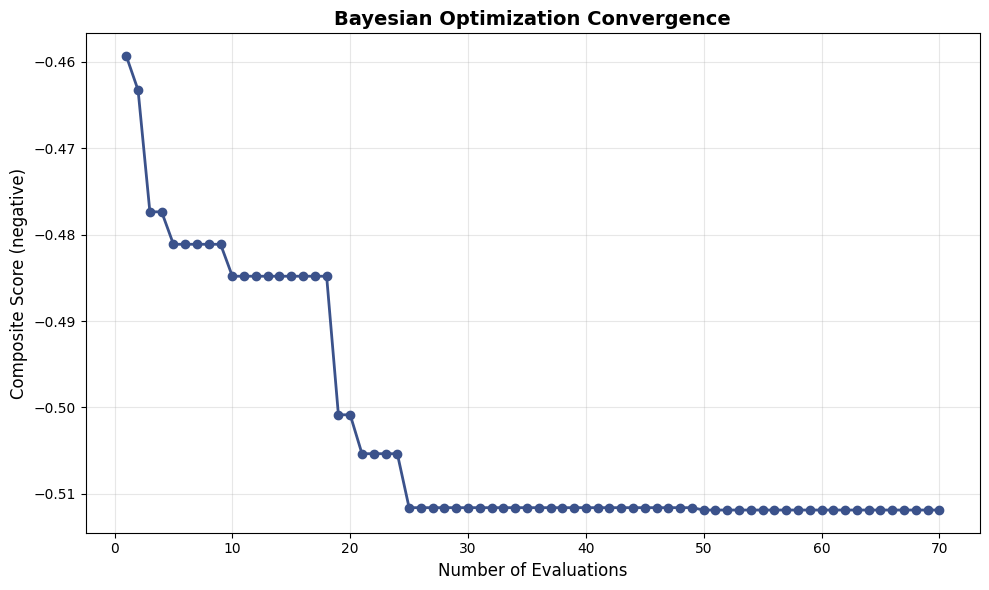

Generating optimization history plot...


2026-02-22 17:40:57 | INFO     | trader_backtest.optimization   | History plot saved to history_plot.png


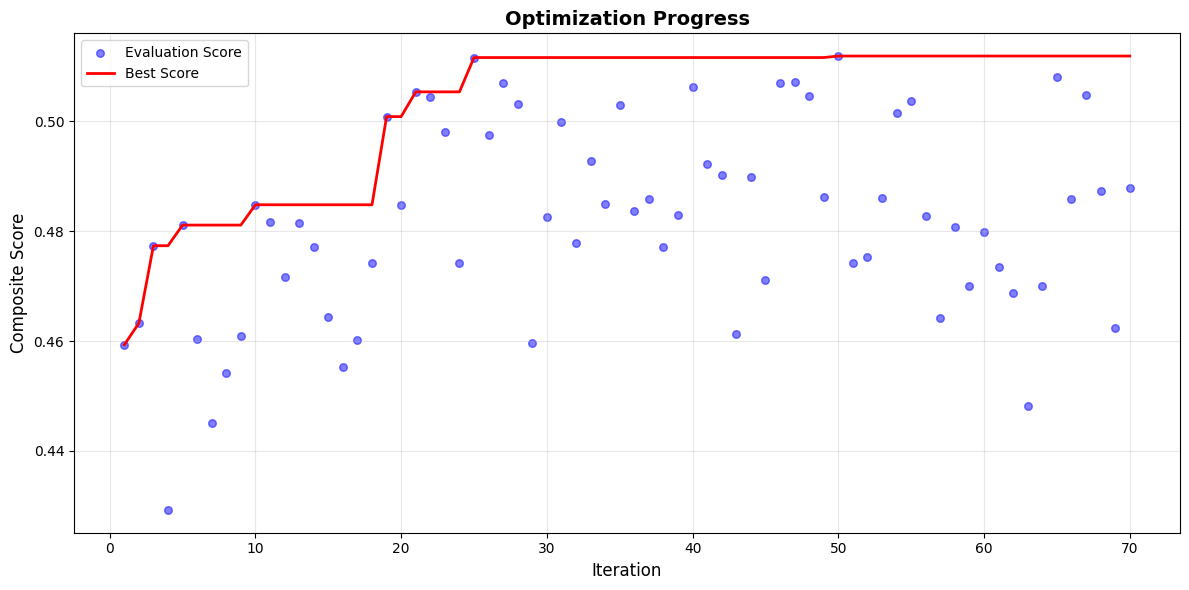

2026-02-22 17:40:57 | INFO     | trader_backtest.optimization   | Results saved to optimization_results.pkl
2026-02-22 17:40:57 | INFO     | trader_backtest.optimization   | Running simulation with optimized parameters...
2026-02-22 17:40:57 | INFO     | trader_backtest.optimization   | Balance period: 7 days
2026-02-22 17:40:57 | INFO     | trader_backtest.optimization   | Ratios: ['0.1004', '0.3455', '0.0013', '0.0017', '0.0566', '0.0526', '0.0385', '0.3398', '0.0636']
2026-02-22 17:40:57 | INFO     | trader_backtest.traders        | Trader initialized: liquid=$1000000.00, balance_period=7, ratios=[0.1004, 0.3455, 0.0013, 0.0017, 0.0566, 0.0526, 0.0385, 0.3398, 0.0636000000000001], sell_strategy=LIFO
2026-02-22 17:40:57 | INFO     | trader_backtest.traders        | Deposit settings: amount=$0.00, period=30
2026-02-22 17:40:57 | INFO     | trader_backtest.simulators     | Starting base simulator with 9 tickers: ['AAPL', 'GOOGL', 'IBIT', 'META', 'IBM', 'PHO', 'VTI', 'NVDA', 'MSFT']
202


Saving optimization results...

Running final simulation with optimized parameters...


2026-02-22 17:40:59 | INFO     | trader_backtest.simulators     | Simulation complete after 503 steps
2026-02-22 17:40:59 | INFO     | trader_backtest.simulators     | Final portfolio value: $1896694.62, liquid: $40955.08



FINAL PERFORMANCE METRICS
Total Portfolio Value: $1,937,649.70
Portfolio Market Value: $1,896,694.62
Liquid Cash: $40,955.08

Returns:
  Total Return: 93.92%
  CAGR: 39.04%

Risk Metrics:
  Sharpe Ratio: 1.21
  Volatility: 29.31%
  Max Drawdown: -29.69%

Trading Metrics:
  Win Rate: 54.38%
  Total Fees: $3,806.52
  Total Tax: $61,340.66
  Total Costs: $65,147.18

Time Period:
  Start Date: 2024-02-16
  End Date: 2026-02-19
  Trading Days: 503

✅ Optimization complete! Results saved to local/ directory.

Files created:
  - local/optimization_results.pkl (optimization results)
  - local/convergence_plot.png (convergence visualization)
  - local/history_plot.png (optimization history)


In [5]:
# Get best parameters
best_params = optimizer.get_best_parameters(result)
print("\nBest Parameters (detailed):")
print(f"  Balance Period: {best_params['balance_period']} days")
print(f"  Composite Score: {best_params['composite_score']:.4f}")
print("\n  Portfolio Allocation:")
for ticker, ratio in zip(tickers, best_params['ratios']):
    print(f"    {ticker}: {ratio * 100:.2f}%")

# Plot convergence
print("\nGenerating convergence plot...")
optimizer.plot_convergence(result, save_path='convergence_plot.png')

# Plot optimization history
print("Generating optimization history plot...")
optimizer.plot_optimization_history(save_path='history_plot.png')

# Save results
print("\nSaving optimization results...")
optimizer.save_results(result, filepath='optimization_results.pkl')

# Run final simulation with best parameters
print("\nRunning final simulation with optimized parameters...")
best_trader = optimizer.run_with_best_params(result, verbose=False)

# Get detailed performance summary
summary = best_trader.get_portfolio_summary()

print("\n" + "=" * 70)
print("FINAL PERFORMANCE METRICS")
print("=" * 70)
print(f"Total Portfolio Value: ${summary['total_value']:,.2f}")
print(f"Portfolio Market Value: ${summary['portfolio_value']:,.2f}")
print(f"Liquid Cash: ${summary['liquid']:,.2f}")
print(f"\nReturns:")
print(f"  Total Return: {summary['total_return_pct']:.2f}%")
print(f"  CAGR: {summary['cagr_pct']:.2f}%")
print(f"\nRisk Metrics:")
print(f"  Sharpe Ratio: {summary['sharpe_ratio']:.2f}")
print(f"  Volatility: {summary['volatility_pct']:.2f}%")
print(f"  Max Drawdown: {summary['max_drawdown_pct']:.2f}%")
print(f"\nTrading Metrics:")
print(f"  Win Rate: {summary['win_rate_pct']:.2f}%")
print(f"  Total Fees: ${summary['total_fees']:,.2f}")
print(f"  Total Tax: ${summary['total_tax']:,.2f}")
print(f"  Total Costs: ${summary['total_costs']:,.2f}")
print(f"\nTime Period:")
print(f"  Start Date: {summary['start_date']}")
print(f"  End Date: {summary['end_date']}")
print(f"  Trading Days: {summary['trading_days']}")
print("=" * 70)

print("\n✅ Optimization complete! Results saved to local/ directory.")
print("\nFiles created:")
print("  - local/optimization_results.pkl (optimization results)")
print("  - local/convergence_plot.png (convergence visualization)")
print("  - local/history_plot.png (optimization history)")

In [6]:
# run simulation with the optimal ratios and period found
market = Market(
    stocks=tickers, start_date=start_date, end_date=end_date
    )
broker = Broker(
    buy_fee_percent=buy_fee, min_buy_fee=min_buy_fee, sell_fee_percent=sell_fee, 
    min_sell_fee=min_sell_fee, tax=tax, market=market
    )
trader_best = Trader(
    liquid=initial_liquid, balance_period=best_params['balance_period'], ratios=best_params['ratios'], 
    deposit=deposit, deposit_period=deposit_period, broker=broker, market=market, verbose=False, 
    sell_strategy=sell_strategy
    )

trader_best, broker, market = base_simulator(market=market, broker=broker, trader=trader_best, verbose=False)
market.reset()

trader_current = Trader(
    liquid=initial_liquid, balance_period=my_period, ratios=my_ratios, 
    deposit=deposit, deposit_period=deposit_period, broker=broker, market=market, verbose=False, 
    sell_strategy=sell_strategy
    )
trader_current, broker, market = base_simulator(market=market, broker=broker, trader=trader_current, verbose=False)

traders_list = [trader_best, trader_current]
portfolio_names = [best_params['balance_period'], my_period]

2026-02-22 17:40:59 | INFO     | trader_backtest.markets        | Initializing Market with 9 tickers: AAPL, GOOGL, IBIT, META, IBM, PHO, VTI, NVDA, MSFT
2026-02-22 17:40:59 | INFO     | trader_backtest.markets        | Date range: 2024-02-16 to 2026-02-20
2026-02-22 17:40:59 | INFO     | trader_backtest.markets        | Benchmark index: ^GSPC
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

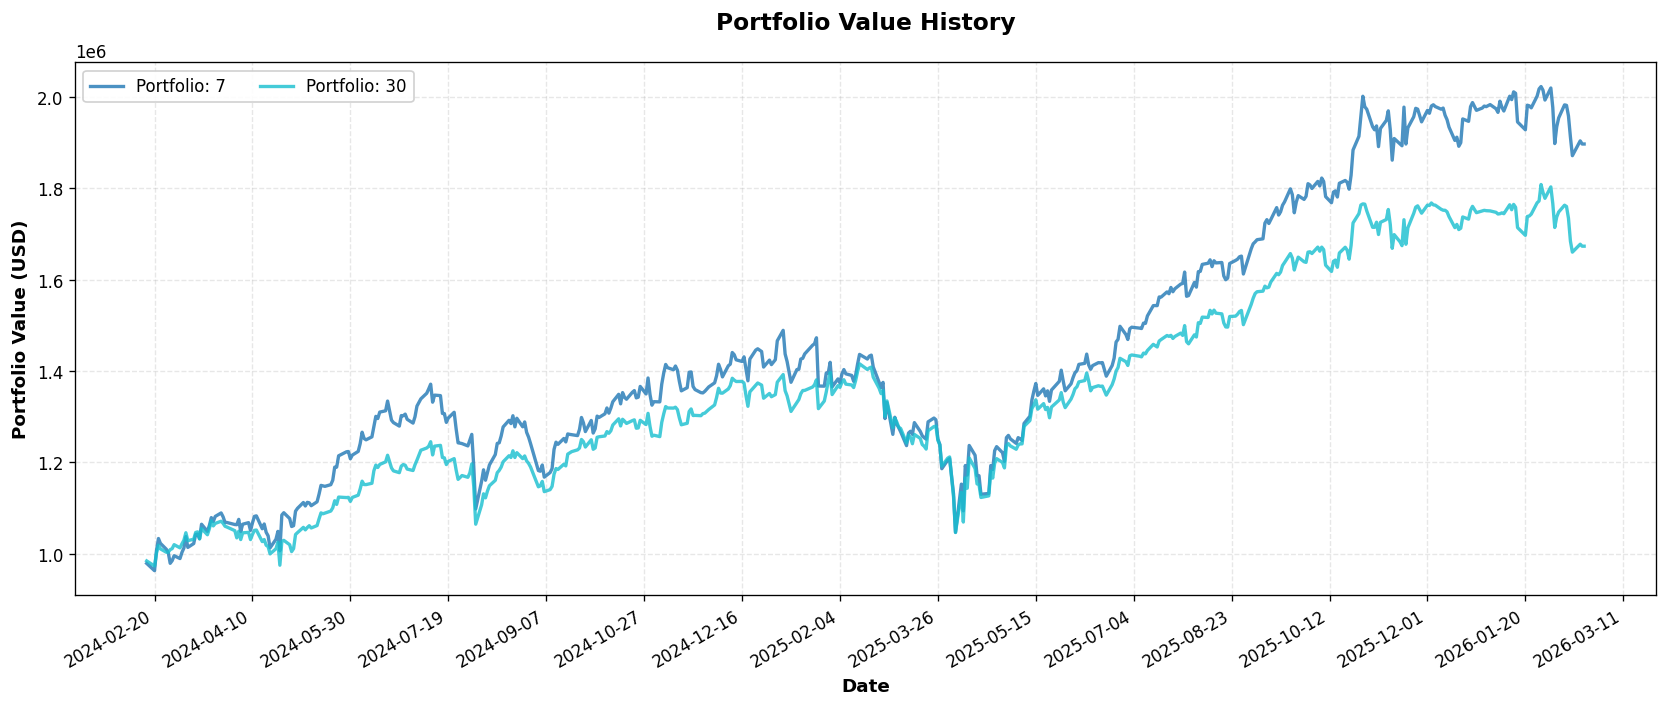

In [7]:
# ==================== Plot 1: Portfolio Value History ====================
portfolio_values(traders_list, portfolio_names, 'Portfolio', use_colors=True, save_path=f"my_optimization_portfolio_values.png")


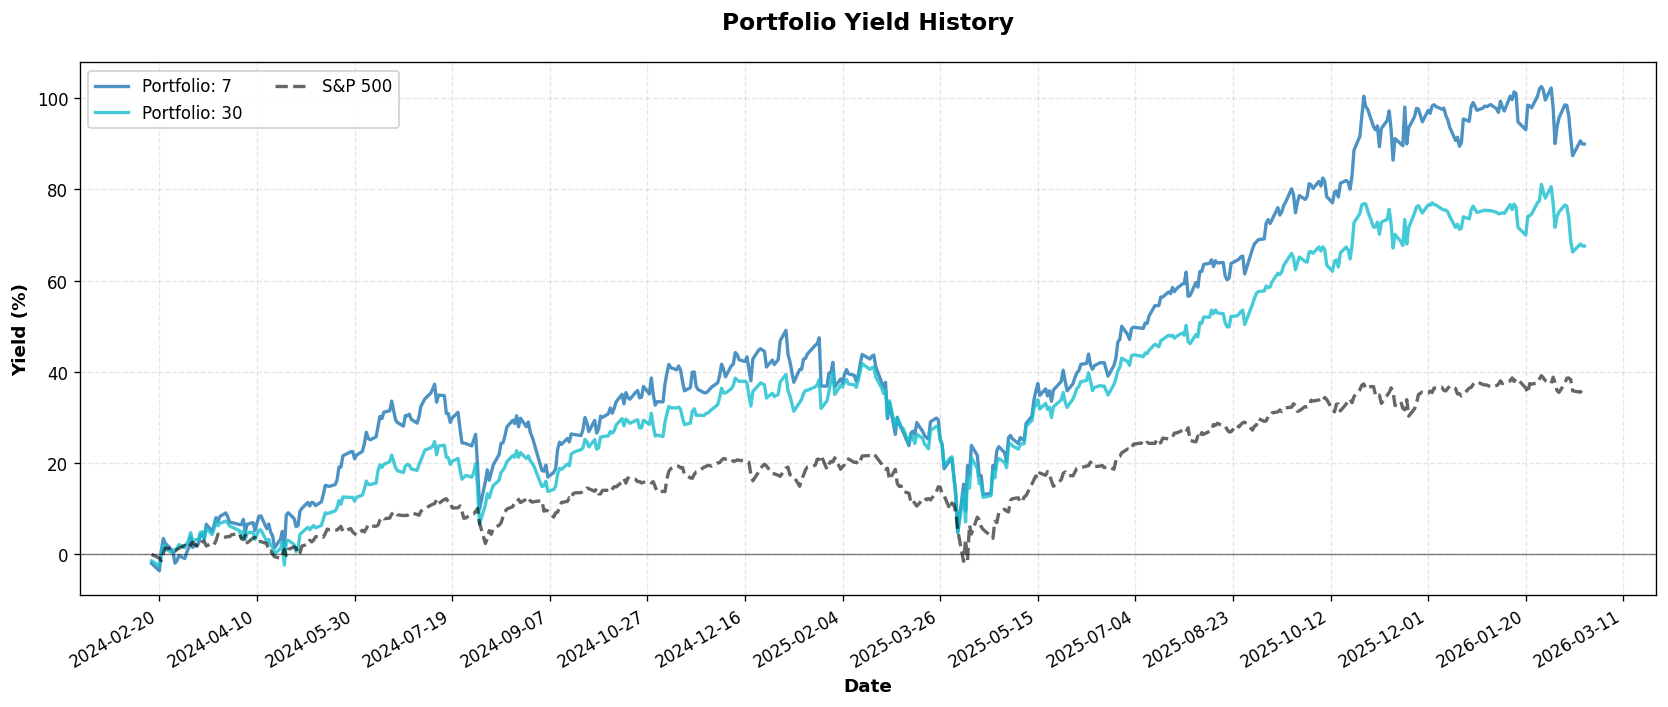

In [8]:
# ==================== Plot 2: Yield History ====================
yields(traders_list, portfolio_names, 'Portfolio', market=market, use_colors=True, save_path=f"my_optimization_yields.png")


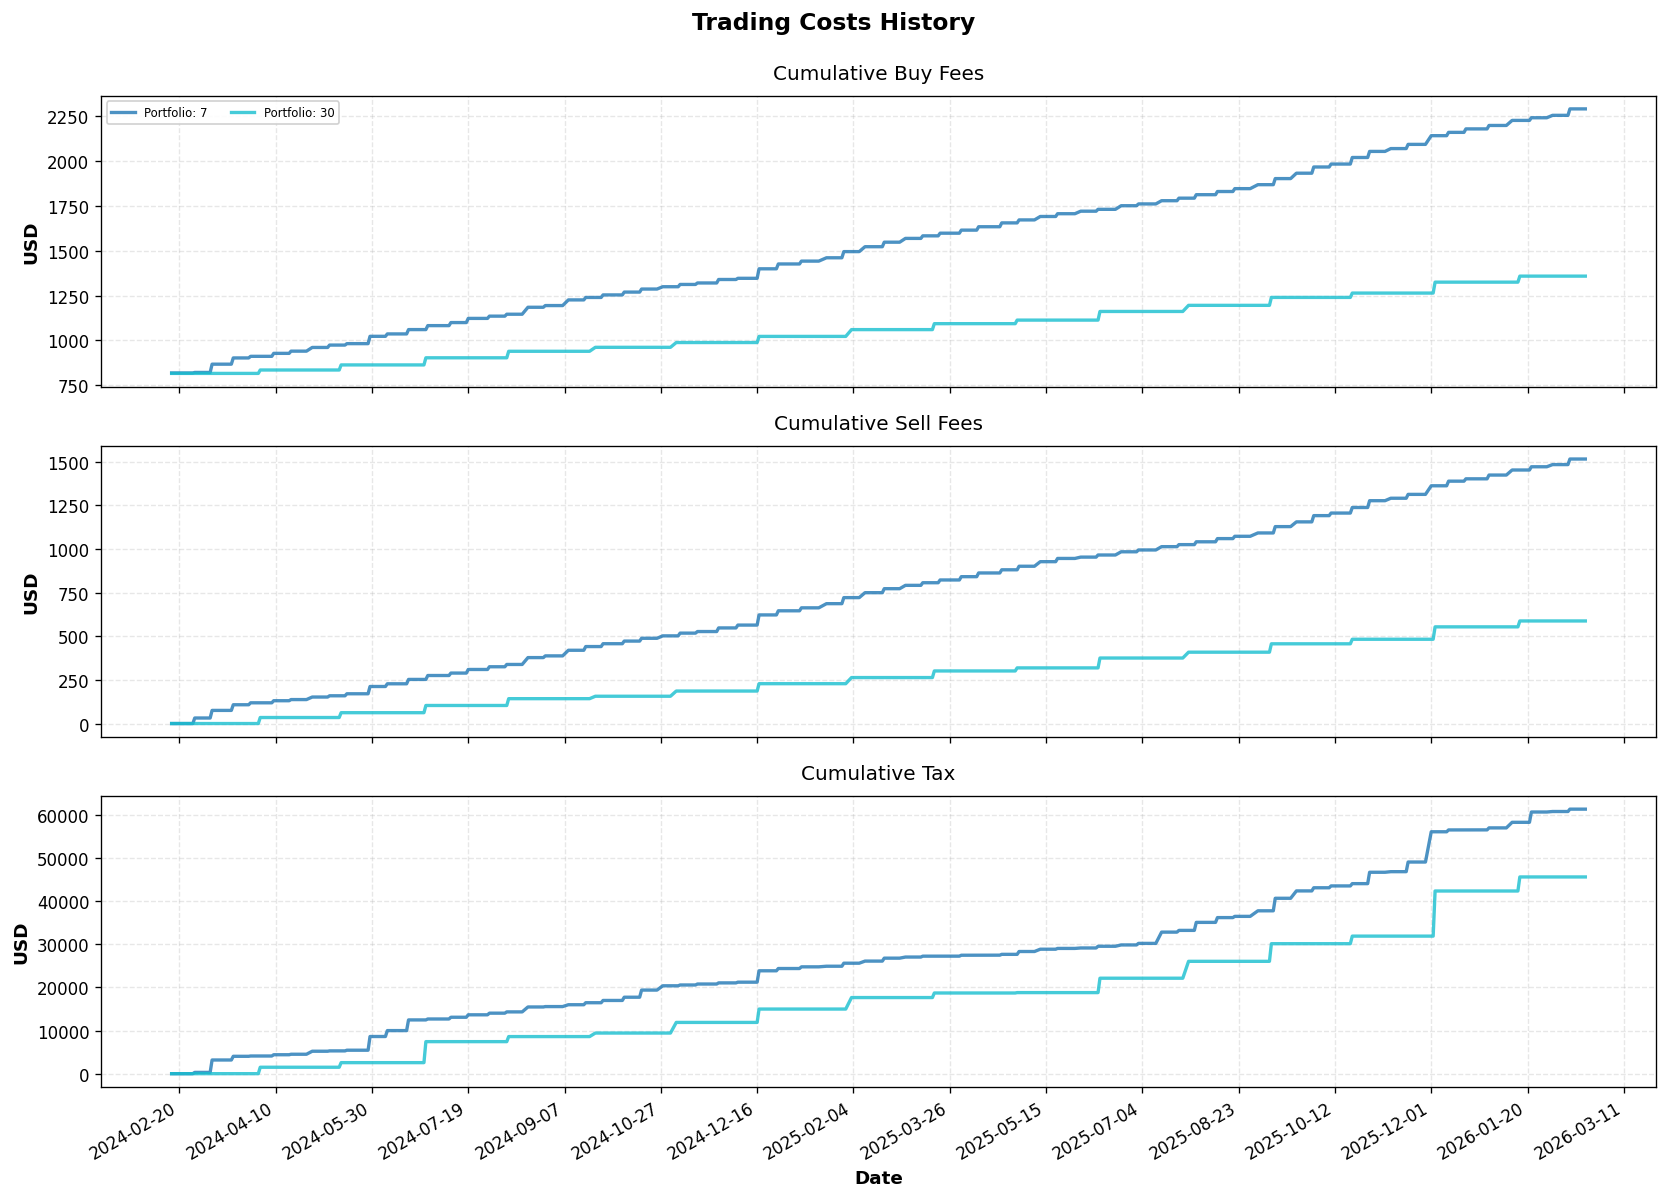

In [9]:
# ==================== Plot 3: Fees and Tax History ====================
fees_and_tax(traders_list, portfolio_names, 'Portfolio', use_colors=True, save_path=f"my_optimization_fees_and_tax.png")


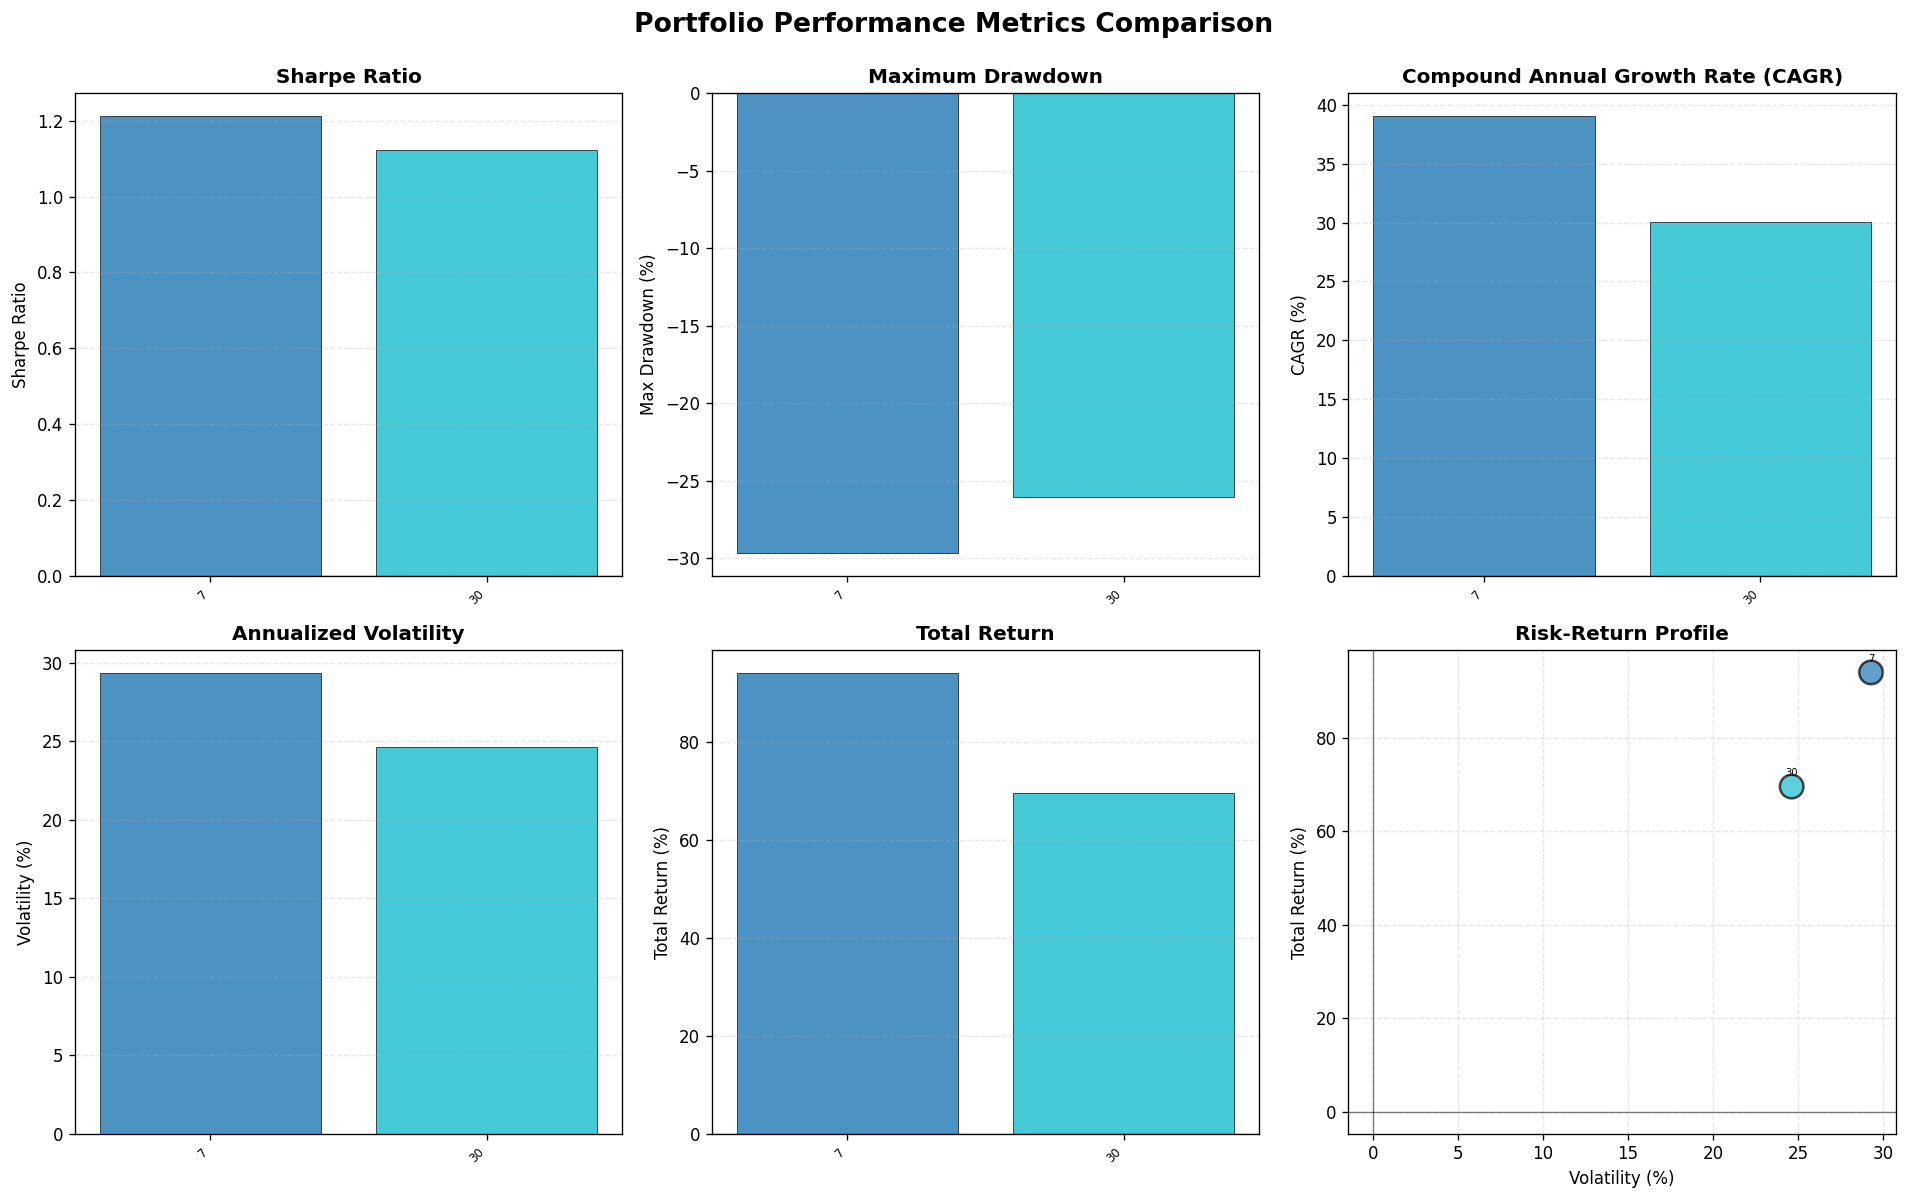

In [10]:
# ==================== Plot 4: Performance Metrics Comparison ====================
plot_performance_metrics(traders_list, portfolio_names, use_colors=True, save_path=f"my_optimization_performance_metrics.png")


In [11]:
# ==================== Print Summary Table ====================
print_performance_summary(traders_list, portfolio_names, start_date, end_date, initial_liquid, best_params['balance_period'])


PORTFOLIO PERFORMANCE SUMMARY
Portfolio                 Total Return    CAGR         Sharpe     Volatility   Max DD      
Name                      (%)             (%)          Ratio      (%)          (%)         
------------------------------------------------------------------------------------------------------------------------
7                                 93.92%      39.04%      1.21      29.31%     -29.69%
30                                69.52%      30.04%      1.12      24.63%     -26.09%

Simulation Period: (2024, 2, 16) to (2026, 2, 20)
Initial Investment: $1,000,000.00
Rebalancing Period: 7 days

